Import Packages

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

#### Pull in facebook data
[Facebook SNAP](https://snap.stanford.edu/data/egonets-Facebook.html)

In [5]:
with open('\\Users\\jashb\\OneDrive\\Documents\\Masters Data Science\\Summer 2024\\DATA 620\\Assignments\\data\\facebook_combined.txt', 'r') as f:
    data = nx.read_edgelist(f, delimiter=' ', create_using=nx.Graph(), nodetype=int)


In [6]:
diameter = nx.diameter(data)
num_nodes = data.number_of_nodes()
num_edges = data.number_of_edges()
density = nx.density(data)

In [7]:
print(f"diameter: {diameter}")
print(f"nodes: {num_nodes}")
print(f"edges: {num_edges}")
print(f"density: {density}")

diameter: 8
nodes: 4039
edges: 88234
density: 0.010819963503439287


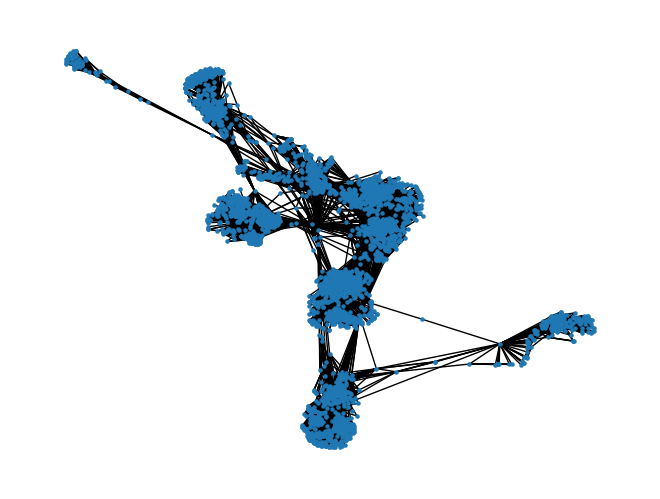

In [8]:
plt.figure()
nx.draw(data, node_size=5)
plt.show()

Alternative visualization tools

In [9]:
pos1 = nx.circular_layout(data)
pos2 = nx.spring_layout(data)
pos3 = nx.spectral_layout(data)

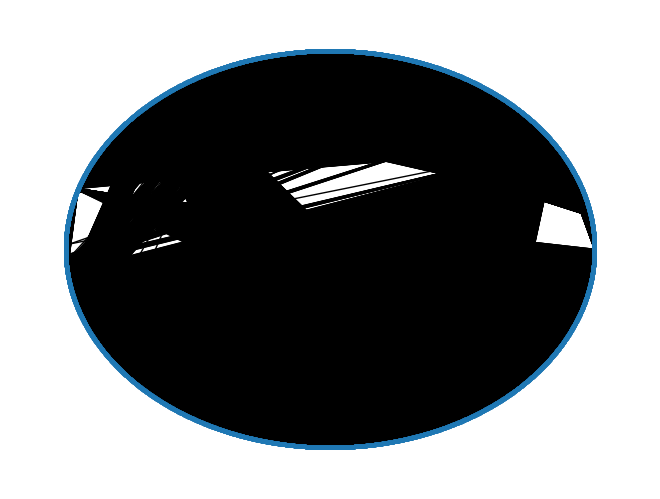

In [10]:
nx.draw(data, pos1, node_size=5)
plt.show()

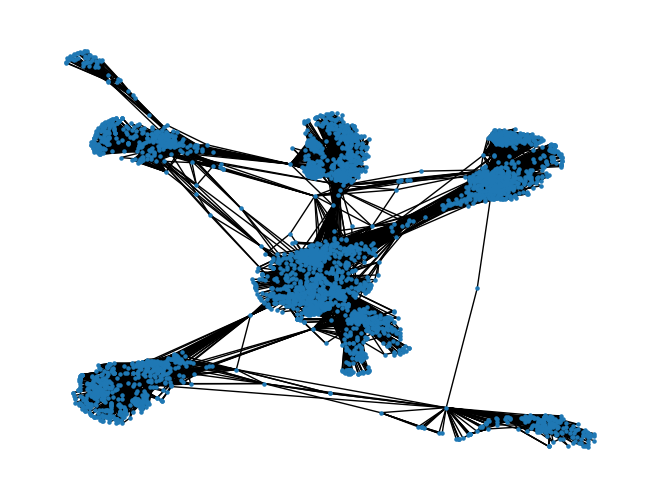

In [11]:
nx.draw(data, pos2, node_size=5)

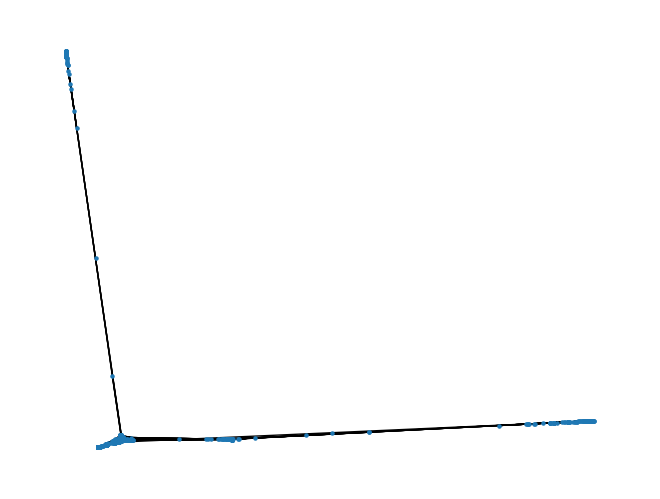

In [12]:
nx.draw(data, pos3, node_size=5)

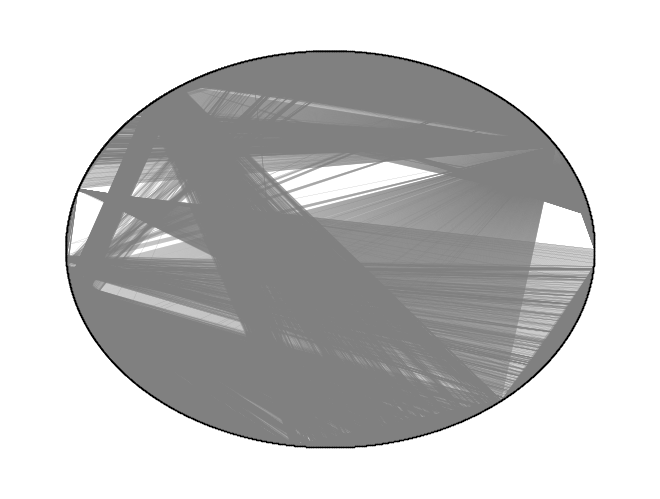

In [13]:
options = {
    "node_color": "black",
    "node_size": 1,
    "edge_color": "gray",
    "linewidths": 0,
    "width": 0.1,
}
nx.draw_circular(data, **options)

Used [Networkx library example](https://networkx.org/documentation/stable/auto_examples/algorithms/plot_beam_search.html#sphx-glr-auto-examples-algorithms-plot-beam-search-py) and fit the graphing functions to our data

In [14]:
import math

import matplotlib.pyplot as plt
import networkx as nx


def progressive_widening_search(G, source, value, condition, initial_width=1):
    """Progressive widening beam search to find a node.

    The progressive widening beam search involves a repeated beam
    search, starting with a small beam width then extending to
    progressively larger beam widths if the target node is not
    found. This implementation simply returns the first node found that
    matches the termination condition.

    `G` is a NetworkX graph.

    `source` is a node in the graph. The search for the node of interest
    begins here and extends only to those nodes in the (weakly)
    connected component of this node.

    `value` is a function that returns a real number indicating how good
    a potential neighbor node is when deciding which neighbor nodes to
    enqueue in the breadth-first search. Only the best nodes within the
    current beam width will be enqueued at each step.

    `condition` is the termination condition for the search. This is a
    function that takes a node as input and return a Boolean indicating
    whether the node is the target. If no node matches the termination
    condition, this function raises :exc:`NodeNotFound`.

    `initial_width` is the starting beam width for the beam search (the
    default is one). If no node matching the `condition` is found with
    this beam width, the beam search is restarted from the `source` node
    with a beam width that is twice as large (so the beam width
    increases exponentially). The search terminates after the beam width
    exceeds the number of nodes in the graph.

    """
    # Check for the special case in which the source node satisfies the
    # termination condition.
    if condition(source):
        return source
    # The largest possible value of `i` in this range yields a width at
    # least the number of nodes in the graph, so the final invocation of
    # `bfs_beam_edges` is equivalent to a plain old breadth-first
    # search. Therefore, all nodes will eventually be visited.
    log_m = math.ceil(math.log2(len(G)))
    for i in range(log_m):
        width = initial_width * pow(2, i)
        # Since we are always starting from the same source node, this
        # search may visit the same nodes many times (depending on the
        # implementation of the `value` function).
        for u, v in nx.bfs_beam_edges(G, source, value, width):
            if condition(v):
                return v
    # At this point, since all nodes have been visited, we know that
    # none of the nodes satisfied the termination condition.
    raise nx.NodeNotFound("no node satisfied the termination condition")

found node 136 with centrality 0.0038943746484735794


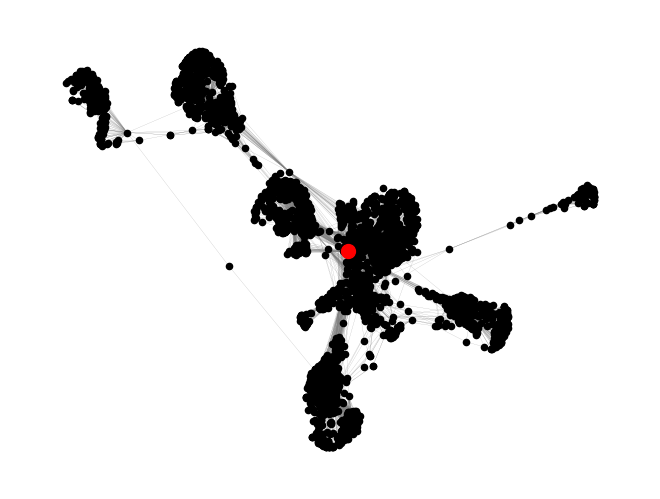

In [21]:
centrality = nx.eigenvector_centrality(data)
average_centrality = sum(centrality.values()) / len(data)

def has_high_centrality(v):
    return centrality[v] >= average_centrality


source = 0
value = centrality.get
condition = has_high_centrality

found_node = progressive_widening_search(data, source, value, condition)
c = centrality[found_node]
print(f"found node {found_node} with centrality {c}")


# Draw graph
pos = nx.spring_layout(data)
options = {
    "node_color": "black",
    "node_size": 20,
    "edge_color": "grey",
    "linewidths": 1,
    "width": 0.1,
}
nx.draw(data, pos, **options)
# Draw node with high centrality as large and red
nx.draw_networkx_nodes(data, pos, nodelist=[found_node], node_size=100, node_color="r")
plt.show()